# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>

## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

## Очистка данных

In [2]:
# Загрузка данных в датафрейм
data = pd.read_csv('telecom_users.csv')

# Вывести первые строки датафрейма
data.head()


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
# посмотрим типы данных столбцов и непропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [4]:
#Посмотрим на столбцы с численными данными
data.describe(include=[np.number])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213
std,2035.705666,0.367909,24.516391,30.114702
min,0.000000,0.000000,0.000000,18.250000
25%,1777.250000,0.000000,9.000000,35.650000
50%,3546.500000,0.000000,29.000000,70.400000
75%,5291.750000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


In [5]:
# Посмотрим на объектные данные
data.describe(include=[object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,5611,2
top,7010-BRBUU,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,10,4399


Видим, что все пользователи уникальны, больше мужчин, неженатых, без иждивенцев, с телефонной связью, с контрактом Month-to-month, безбумажным биллингом, оставшихся.
Но в то же время видим больше тысячи "ушедших" клиентов.

Значит запись csv была сделана с пробелами, python не распознает символ пробела как nan . Нам нужно перезаписать пустые ячейки в NaN.

In [6]:
data = data.replace(r'^\s*$', np.nan, regex=True)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [7]:
data.describe(include=[np.number])

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5976.000000
mean,3533.561310,0.161377,32.468760,64.802213,2298.060617
std,2035.705666,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1777.250000,0.000000,9.000000,35.650000,404.312500
50%,3546.500000,0.000000,29.000000,70.400000,1412.150000
75%,5291.750000,0.000000,56.000000,89.900000,3846.962500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [8]:
data['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

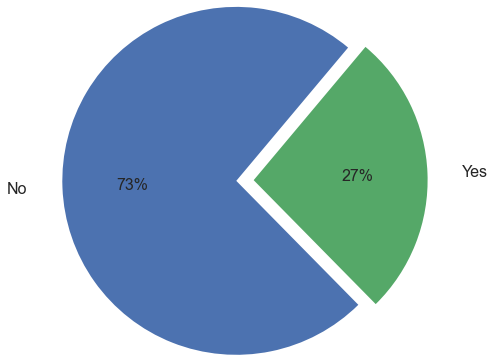

In [9]:
data['Churn'] = [elem if 'No' else 'Yes' for elem in data['Churn'] ]
churn = data['Churn'].value_counts()
myexplode = [0.2, 0]
plot = churn.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, startangle=50, radius=2, explode=myexplode)

Получается, что 27% клиентов ушло.

# 2. Исследование зависимостей и формулирование гипотез

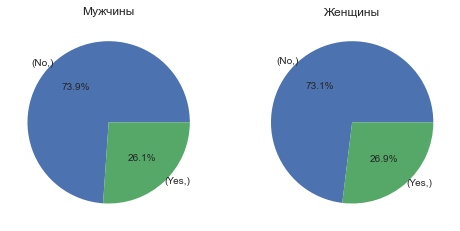

In [10]:
gender_m = data.loc[data['gender']=='Male', ['Churn']].copy().value_counts()
gender_w = data.loc[data['gender']=='Female', ['Churn']].copy().value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)
gender_m.plot.pie(figsize=(9, 9), title="Мужчины", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
gender_w.plot.pie(figsize=(8, 8), title="Женщины", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
plt.show()

Видим, что пол не имеет никакого отношения к оттоку клиентов. Теперь проверим те метрики, которые оставили. Начнём с наличия супруга.

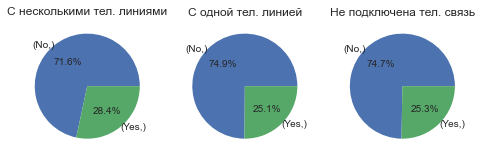

In [13]:
multiplelines_y = data.loc[data['MultipleLines']=='Yes', ['Churn']].copy().value_counts()
multiplelines_n = data.loc[data['MultipleLines']=='No', ['Churn']].copy().value_counts()
multiplelines_p = data.loc[data['MultipleLines']=='No phone service', ['Churn']].copy().value_counts()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
multiplelines_y.plot.pie(figsize=(8, 8), title="С несколькими тел. линиями", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
multiplelines_n.plot.pie(figsize=(8, 8), title="С одной тел. линией", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
multiplelines_p.plot.pie(figsize=(8, 8), title="Не подключена тел. связь", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax3)
plt.show()

Видим, что наличие или отсутствие нескольких телефонных линий значения не имеет.

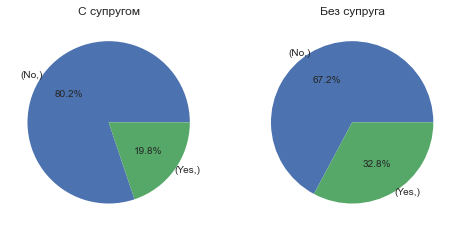

In [15]:
partner_y = data.loc[data['Partner']=='Yes', ['Churn']].copy().value_counts()
partner_n = data.loc[data['Partner']=='No', ['Churn']].copy().value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)
partner_y.plot.pie(figsize=(9, 9), title="С супругом", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
partner_n.plot.pie(figsize=(8, 8), title="Без супруга", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
plt.show()

Клиенты без супругов на 13% чаще уходят. 

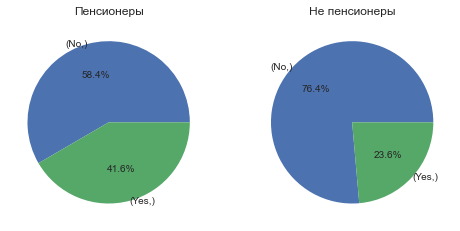

In [17]:
seniorcitizen_y = data.loc[data['SeniorCitizen']==1, ['Churn']].copy().value_counts()
seniorcitizen_n = data.loc[data['SeniorCitizen']==0, ['Churn']].copy().value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)
seniorcitizen_y.plot.pie(figsize=(9, 9), title="Пенсионеры", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
seniorcitizen_n.plot.pie(figsize=(8, 8), title="Не пенсионеры", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
plt.show()

Видим, что пенсионеры уходят гораздо чаще.

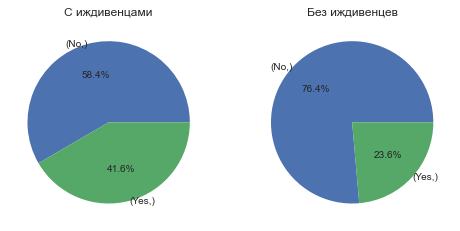

In [18]:
dependents_y = data.loc[data['Dependents']=='Yes', ['Churn']].copy().value_counts()
dependents_n = data.loc[data['Dependents']=='No', ['Churn']].copy().value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2)
seniorcitizen_y.plot.pie(figsize=(9, 9), title="С иждивенцами", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
seniorcitizen_n.plot.pie(figsize=(8, 8), title="Без иждивенцев", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
plt.show()

С иждивенцами уходят в два раза чаще.

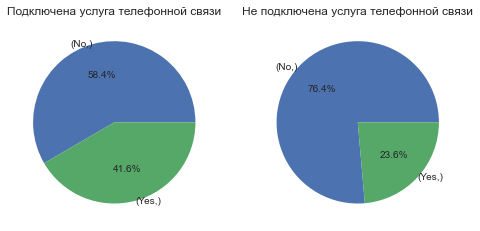

In [19]:
phone_service_y = data.loc[data['PhoneService']=='Yes', ['Churn']].copy().value_counts()
phone_service_n = data.loc[data['PhoneService']=='No', ['Churn']].copy().value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2)
seniorcitizen_y.plot.pie(figsize=(9, 9), title="Подключена услуга телефонной связи", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
seniorcitizen_n.plot.pie(figsize=(8, 8), title="Не подключена услуга телефонной связи", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
plt.show()

Клиенты, подключившие услугу телефонной связи уходят в 2 раза чаще, стоит над этим задуматься.

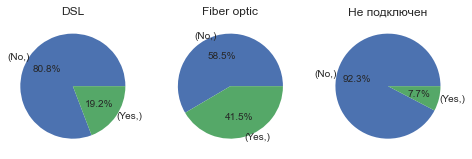

In [20]:
internet_service_dsl = data.loc[data['InternetService']=='DSL', ['Churn']].value_counts()
internet_service_fo = data.loc[data['InternetService']=='Fiber optic', ['Churn']].value_counts()
internet_service_n = data.loc[data['InternetService']=='No', ['Churn']].value_counts()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
internet_service_dsl.plot.pie(figsize=(8, 8), title="DSL", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
internet_service_fo.plot.pie(figsize=(8, 8), title="Fiber optic", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
internet_service_n.plot.pie(figsize=(8, 8), title="Не подключен", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax3)
plt.show()

Видим, что те, у кого подключение по Fiber optic уходят гораздо чаще, и почти совсем не уходят те, у кого интернет не подключен.

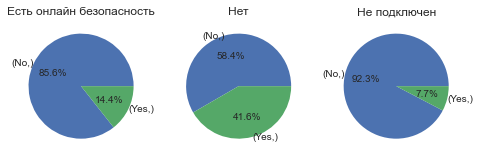

In [21]:
online_security_y = data.loc[data['OnlineSecurity']=='Yes', ['Churn']].value_counts()
online_security_n = data.loc[data['OnlineSecurity']=='No', ['Churn']].value_counts()
online_security_ns = data.loc[data['OnlineSecurity']=='No internet service', ['Churn']].value_counts()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
online_security_y.plot.pie(figsize=(8, 8), title="Есть онлайн безопасность", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
online_security_n.plot.pie(figsize=(8, 8), title="Нет", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
online_security_ns.plot.pie(figsize=(8, 8), title="Не подключен", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax3)
plt.show()

Данные практически также распределяются, как и в предыдущем случае.

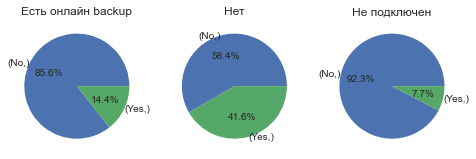

In [22]:
online_backup_y = data.loc[data['OnlineBackup']=='Yes', ['Churn']].value_counts()
online_backup_n = data.loc[data['OnlineBackup']=='No', ['Churn']].value_counts()
online_backup_ns = data.loc[data['OnlineBackup']=='No internet service', ['Churn']].value_counts()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
online_security_y.plot.pie(figsize=(8, 8), title="Есть онлайн backup", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
online_security_n.plot.pie(figsize=(8, 8), title="Нет", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
online_security_ns.plot.pie(figsize=(8, 8), title="Не подключен", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax3)
plt.show()

Данные такие же, поэтому и эту колонку учитывать не будем.

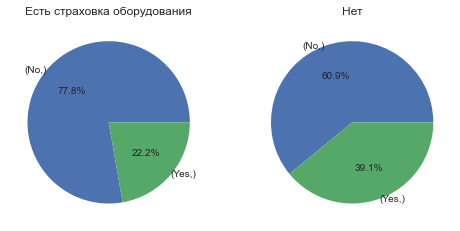

In [23]:
device_protection_y = data.loc[data['DeviceProtection']=='Yes', ['Churn']].value_counts()
device_protection_n = data.loc[data['DeviceProtection']=='No', ['Churn']].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)
device_protection_y.plot.pie(figsize=(8, 8), title="Есть страховка оборудования", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
device_protection_n.plot.pie(figsize=(8, 8), title="Нет", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
plt.show()

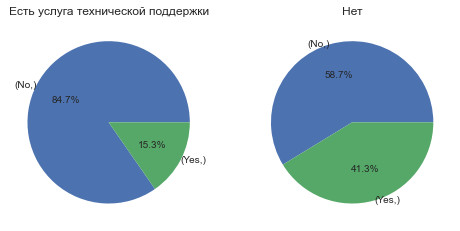

In [24]:
tech_support_y = data.loc[data['TechSupport']=='Yes', ['Churn']].value_counts()
tech_support_n = data.loc[data['TechSupport']=='No', ['Churn']].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)
tech_support_y.plot.pie(figsize=(8, 8), title="Есть услуга технической поддержки", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
tech_support_n.plot.pie(figsize=(8, 8), title="Нет", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
plt.show()

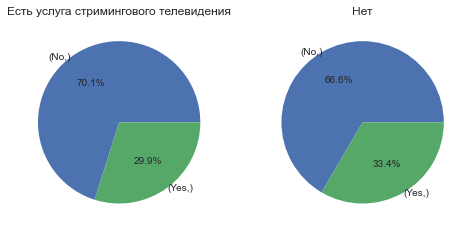

In [25]:
streaming_tv_y = data.loc[data['StreamingTV']=='Yes', ['Churn']].value_counts()
streaming_tv_n = data.loc[data['StreamingTV']=='No', ['Churn']].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)
streaming_tv_y.plot.pie(figsize=(8, 8), title="Есть услуга стримингового телевидения", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
streaming_tv_n.plot.pie(figsize=(8, 8), title="Нет", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
plt.show()

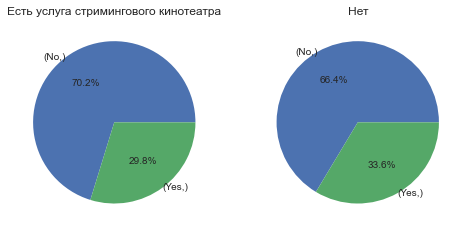

In [26]:
streaming_movies_y = data.loc[data['StreamingMovies']=='Yes', ['Churn']].value_counts()
streaming_movies_n = data.loc[data['StreamingMovies']=='No', ['Churn']].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)
streaming_movies_y.plot.pie(figsize=(8, 8), title="Есть услуга стримингового кинотеатра", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
streaming_movies_n.plot.pie(figsize=(8, 8), title="Нет", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
plt.show()

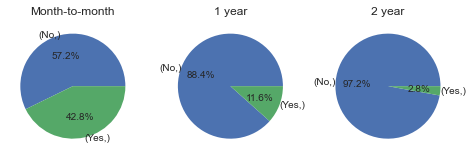

In [27]:
contract_mm = data.loc[data['Contract']=='Month-to-month', ['Churn']].value_counts()
contract1 = data.loc[data['Contract']=='One year', ['Churn']].value_counts()
contract2 = data.loc[data['Contract']=='Two year', ['Churn']].value_counts()

fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
contract_mm.plot.pie(figsize=(8, 8), title="Month-to-month", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
contract1.plot.pie(figsize=(8, 8), title="1 year", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
contract2.plot.pie(figsize=(8, 8), title="2 year", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax3)
plt.show()

Чаще всего уходят те, у кого помесячная оплата. Остальные уходят гораздо реже.

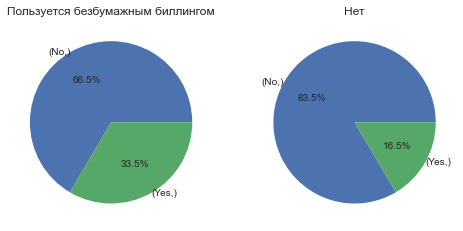

In [28]:
paperless_billing_y = data.loc[data['PaperlessBilling']=='Yes', ['Churn']].value_counts()
paperless_billing_n = data.loc[data['PaperlessBilling']=='No', ['Churn']].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2)
paperless_billing_y.plot.pie(figsize=(8, 8), title="Пользуется безбумажным биллингом", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
paperless_billing_n.plot.pie(figsize=(8, 8), title="Нет", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
plt.show()

Кто пользуется безбумажным биллингом уходят почти в 2 раза чаще.

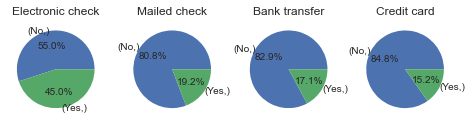

In [29]:
payment_method_ec = data.loc[data['PaymentMethod']=='Electronic check', ['Churn']].value_counts()
payment_method_mc = data.loc[data['PaymentMethod']=='Mailed check', ['Churn']].value_counts()
payment_method_bt = data.loc[data['PaymentMethod']=='Bank transfer (automatic)', ['Churn']].value_counts()
payment_method_cc = data.loc[data['PaymentMethod']=='Credit card (automatic)', ['Churn']].value_counts()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
payment_method_ec.plot.pie(figsize=(8, 8), title="Electronic check", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax1)
payment_method_mc.plot.pie(figsize=(8, 8), title="Mailed check", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax2)
payment_method_bt.plot.pie(figsize=(8, 8), title="Bank transfer", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax3)
payment_method_cc.plot.pie(figsize=(8, 8), title="Credit card", autopct='%1.1f%%', labeldistance=1, radius=1, label="", ax=ax4)
plt.show()

Практически половина тех, кто платит электронными чеками уходит.

Нарисуем матрицу графиков рассеяния. Для этого будем использовать только численные колонки.

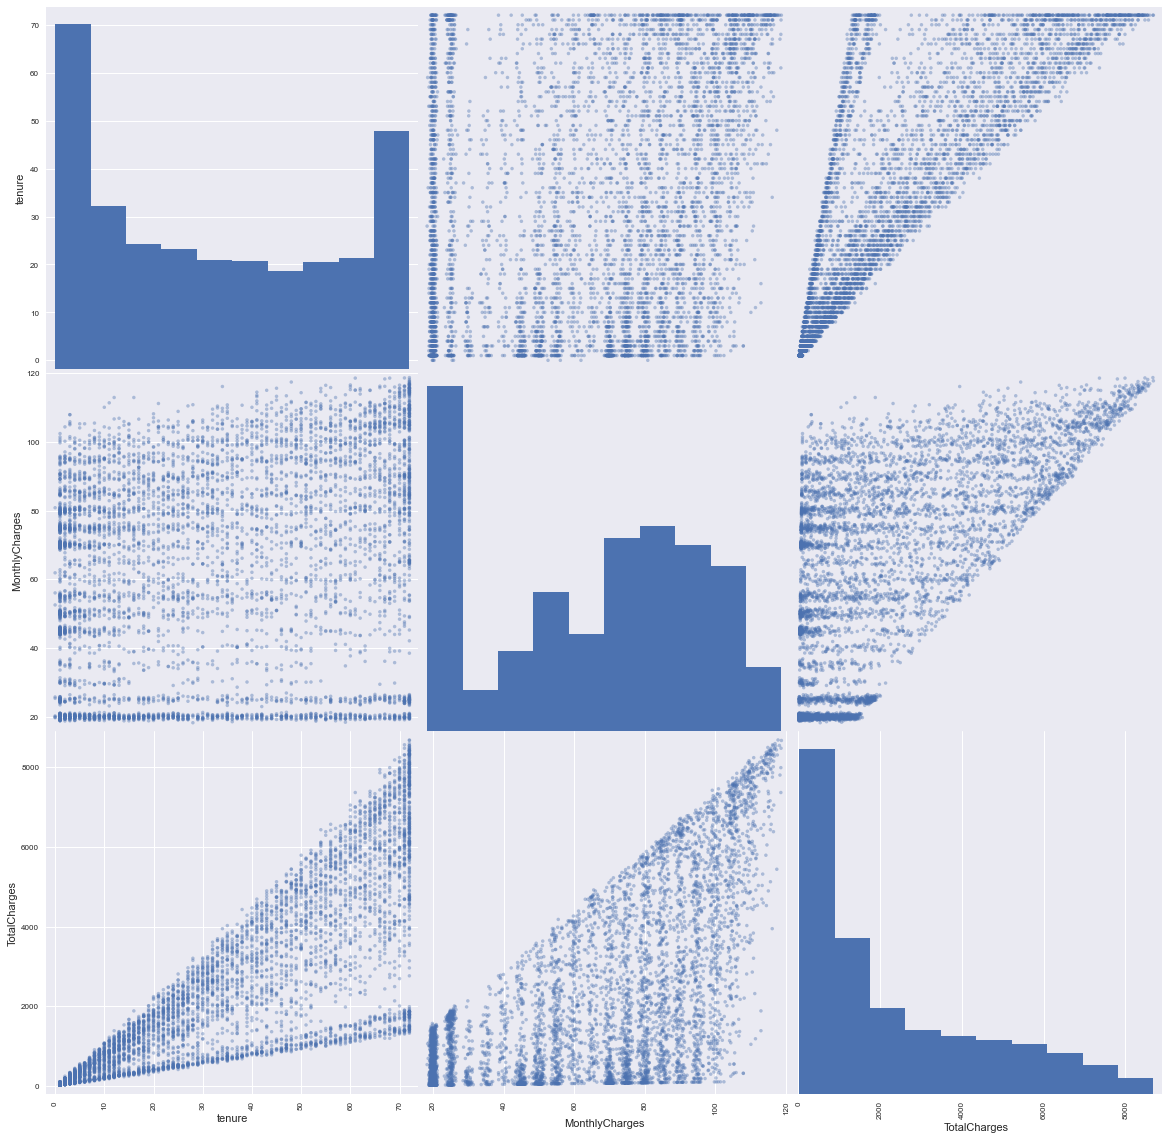

In [30]:
scat_mtrx = pd.plotting.scatter_matrix(data[['tenure', 'MonthlyCharges', 'TotalCharges']], figsize=(20, 20), alpha=.4)

Видим понятную взаимосвязь между тем, как долго человек является клиентом и общая сумма выплат за это время.<br>
И практически такая же зависимость между месячный размер оплаты на настоящий момент и общей суммой. А это уже интересно.

Соберём датасет из колонок, которые отличаются больше у оставшихся клиентов и ушедших, возможно так мы выявим причины их поведения.

In [10]:
clients = data[['Partner', 'SeniorCitizen', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn']]
clients

,Partner,SeniorCitizen,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Yes,0,Yes,Yes,No,Two year,No,Credit card (automatic),24.10,No
1,No,0,No,Yes,Fiber optic,Month-to-month,Yes,Credit card (automatic),88.15,No
2,Yes,1,No,Yes,Fiber optic,Month-to-month,Yes,Bank transfer (automatic),74.95,Yes
3,No,0,No,Yes,DSL,Month-to-month,Yes,Electronic check,55.90,No
4,No,0,No,Yes,DSL,Month-to-month,No,Electronic check,53.45,No
...,...,...,...,...,...,...,...,...,...,...
5981,Yes,0,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check,95.00,Yes
5982,Yes,0,Yes,Yes,DSL,Two year,Yes,Credit card (automatic),91.10,No
5983,Yes,0,Yes,Yes,No,Month-to-month,Yes,Electronic check,21.15,No
5984,No,1,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check,99.45,Yes


Соберём данные отдельно, по тем, кто ушёл и по тем, кто остался, узнаем насколько критичны выбранные показатели.

In [11]:
client_churn = clients[(clients['Churn'] == 'Yes')]
client_churn

,Partner,SeniorCitizen,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
2,Yes,1,No,Yes,Fiber optic,Month-to-month,Yes,Bank transfer (automatic),74.95,Yes
11,Yes,0,Yes,No,DSL,Month-to-month,No,Credit card (automatic),51.20,Yes
18,Yes,0,Yes,Yes,Fiber optic,Month-to-month,Yes,Electronic check,94.20,Yes
19,Yes,0,No,No,DSL,Month-to-month,No,Electronic check,46.35,Yes
23,No,0,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check,96.20,Yes
...,...,...,...,...,...,...,...,...,...,...
5973,Yes,1,No,Yes,Fiber optic,Month-to-month,Yes,Mailed check,76.40,Yes
5976,Yes,0,Yes,Yes,Fiber optic,Two year,Yes,Bank transfer (automatic),107.95,Yes
5980,No,0,No,No,DSL,Month-to-month,Yes,Mailed check,25.10,Yes
5981,Yes,0,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check,95.00,Yes


In [33]:
client_stayed = clients[(clients['Churn'] == 'No')]
client_stayed

,Partner,SeniorCitizen,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Yes,0,Yes,Yes,No,Two year,No,Credit card (automatic),24.10,No
1,No,0,No,Yes,Fiber optic,Month-to-month,Yes,Credit card (automatic),88.15,No
3,No,0,No,Yes,DSL,Month-to-month,Yes,Electronic check,55.90,No
4,No,0,No,Yes,DSL,Month-to-month,No,Electronic check,53.45,No
5,Yes,0,No,No,DSL,Two year,Yes,Bank transfer (automatic),49.85,No
...,...,...,...,...,...,...,...,...,...,...
5978,No,0,No,Yes,DSL,Month-to-month,Yes,Mailed check,45.25,No
5979,Yes,0,Yes,Yes,DSL,Two year,Yes,Mailed check,89.40,No
5982,Yes,0,Yes,Yes,DSL,Two year,Yes,Credit card (automatic),91.10,No
5983,Yes,0,Yes,Yes,No,Month-to-month,Yes,Electronic check,21.15,No


Посмотрим статистику по каждому из датасетов

In [34]:
client_churn.describe(include=[np.number])

,SeniorCitizen,MonthlyCharges
count,1587.000000,1587.000000
mean,0.253308,74.164871
std,0.435043,24.965002
min,0.000000,18.850000
25%,0.000000,55.675000
50%,0.000000,79.500000
75%,1.000000,94.400000
max,1.000000,118.350000


In [35]:
client_churn.describe(include=[object])

,Partner,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,Churn
count,1587,1587,1587,1587,1587,1587,1587,1587
unique,2,2,2,3,3,2,4,1
top,No,No,Yes,Fiber optic,Month-to-month,Yes,Electronic check,Yes
freq,1011,1306,1438,1091,1398,1181,902,1587


Получается портрет ушедшего клиента - непенсионер, в месяц платит 79.5, одинокий, без иждивенцев, с подключенной услугой телефонной связи, Fiber optic, платит каждый месяц электронными чеками, по электронным счетам.

In [36]:
client_stayed.describe(include=[np.number])

,SeniorCitizen,MonthlyCharges
count,4399.000000,4399.000000
mean,0.128211,61.424506
std,0.334363,31.086101
min,0.000000,18.250000
25%,0.000000,25.125000
50%,0.000000,64.750000
75%,0.000000,88.700000
max,1.000000,118.750000


In [37]:
client_stayed.describe(include=[object])

,Partner,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,Churn
count,4399,4399,4399,4399,4399,4399,4399,4399
unique,2,2,2,3,3,2,4,1
top,Yes,No,Yes,DSL,Month-to-month,Yes,Mailed check,No
freq,2328,2889,3958,1671,1871,2347,1106,4399


Усреднённый портрет оставшегося клиента: непенсионер, в месяц платит 64.75, с супругом, без иждивенцев, с подключенной услугой телефонной связи, DSL, платит каждый месяц Mailed check, по электронным счетам.

In [11]:
features_names = ['Partner', 'SeniorCitizen', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

Так как удобнее исследовать числа чем строки, нужно заменить нечисловые колонки<br>
Для этого используем OrdinalEncoder.

In [12]:
s = (clients.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [13]:
from sklearn.preprocessing import OrdinalEncoder

label_clients = clients.copy()

ordinal_encoder = OrdinalEncoder()
label_clients[object_cols] = ordinal_encoder.fit_transform(clients[object_cols])
label_clients.head()

,Partner,SeniorCitizen,Dependents,PhoneService,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1.0,0,1.0,1.0,2.0,2.0,0.0,1.0,24.10,0.0
1,0.0,0,0.0,1.0,1.0,0.0,1.0,1.0,88.15,0.0
2,1.0,1,0.0,1.0,1.0,0.0,1.0,0.0,74.95,1.0
3,0.0,0,0.0,1.0,0.0,0.0,1.0,2.0,55.90,0.0
4,0.0,0,0.0,1.0,0.0,0.0,0.0,2.0,53.45,0.0


In [14]:
label_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partner           5986 non-null   float64
 1   SeniorCitizen     5986 non-null   int64  
 2   Dependents        5986 non-null   float64
 3   PhoneService      5986 non-null   float64
 4   InternetService   5986 non-null   float64
 5   Contract          5986 non-null   float64
 6   PaperlessBilling  5986 non-null   float64
 7   PaymentMethod     5986 non-null   float64
 8   MonthlyCharges    5986 non-null   float64
 9   Churn             5986 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 467.8 KB


Для построения модели нужны методы классификации (отнесение объекта к одной из категорий на основании его признаков).<br>
Наша задача обучить модель выяснять, к какой группе относится клиент - готов ли он уйти или остаться. Что может повлиять на его решение? <br>
Для начала нужно разделить данные.

In [15]:
X = label_clients[features_names]
y = label_clients.Churn

# 3. Построение моделей для прогнозирования оттока

 ### Mетоды классификации

Импортируем нужные библиотеки

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import GridSearchCV

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, recall_score

#### Линейный дискриминантный анализ

Следующий код делит данные на обучающие и тестовые наборы.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

Выполним масштабирование объектов.

In [18]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

Определимся с моделями и параметрами к ним

In [20]:
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
lr = LogisticRegression()

In [21]:
def get_models():
    models = list()
    models.append(dtc)
    models.append(knn)
    models.append(svc)
    models.append(lr)
    return models

models = get_models()

In [22]:
parametrs1 = {'criterion' : ('gini', 'entropy'),
             'splitter' : ('best', 'random'),
            'max_depth' : range(1,13, 2),
              'min_samples_leaf' : range(1,8),
              'min_samples_split' : range(2,10,2)}

In [23]:
parametrs2 = {'n_neighbors': range(5, 10, 51),
             'weights' : ('uniform', 'distance'),
             'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size': range(20, 30, 50),
            'p' : range(1,2)}

In [24]:
parametrs3 = {'gamma': ['scale', 'auto'],
            'C': range (2, 3, 4),
              'degree': range (1, 2, 3)}

In [25]:
parametrs4 = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
             'C': range(2, 3, 4)}

In [26]:
parametrs = [parametrs1, parametrs2, parametrs3, parametrs4]

In [27]:
def grid(models, parametrs):
    index = 0
    for model in models:
        grid_m = GridSearchCV(model, parametrs[index], cv=5)
        grid_m.fit(x_train, y_train)
        print(model, ' : ', grid_m.best_params_)
        index += 1

In [28]:
grid(models, parametrs)

DecisionTreeClassifier()  :  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 8, 'splitter': 'random'}
KNeighborsClassifier()  :  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
SVC()  :  {'C': 2, 'degree': 1, 'gamma': 'scale'}
LogisticRegression()  :  {'C': 2, 'solver': 'liblinear'}


In [29]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5, min_samples_split=8, splitter='random', random_state=17)
knn = KNeighborsClassifier(n_neighbors=5, leaf_size=20, p=1, weights='uniform')
nb = GaussianNB()
svc = SVC(C=2, degree=1, gamma='scale', random_state=17)
lr = LogisticRegression(random_state=17, solver='liblinear', C=2)

Составим список моделей

In [30]:
def get_models():
    models = list()
    models.append(knn)
    models.append(dtc)
    models.append(nb)
    models.append(svc)
    models.append(lr)
    return models

models = get_models()

Обучение и составление прогнозов

In [31]:
def best_model(models):
    for model in models:
        model_fit = model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        print(model)
        print()
        print('roc_auc_score ' + str(roc_auc_score(y_test, prediction)))
        print()
        print()

In [32]:
best_model(models)

KNeighborsClassifier(leaf_size=20, p=1)

roc_auc_score 0.6240139084834491


DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=8, random_state=17, splitter='random')

roc_auc_score 0.6505890465022387


GaussianNB()

roc_auc_score 0.709167078719476


SVC(C=2, degree=1, random_state=17)

roc_auc_score 0.6463441465063214


LogisticRegression(C=2, random_state=17, solver='liblinear')

roc_auc_score 0.6479114593020354




GaussianNB() пока явно лидирует

Попробуем Pipeline, кроме лидера возьмём ещё SVC и GaussianNB

In [33]:
from sklearn.pipeline import Pipeline


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


pipe = Pipeline([('scaler', StandardScaler()), ('dtc', DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5, 
                                                                              min_samples_split=8, random_state=17, splitter='random'))])#с DecisionTreeClassifier

pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('dtc', DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=8, random_state=17, splitter='random'))])
pipe.score(X_test, y_test)

0.7655310621242485

In [34]:
pipe = Pipeline([('scaler', StandardScaler()), ('nb', GaussianNB())])#с GaussianNB

pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('nb', GaussianNB())])
pipe.score(X_test, y_test)

0.7408149632598531

In [35]:
pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(C=2, random_state=17, solver='liblinear'))])#с LogisticRegression

pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression(C=2, random_state=17, solver='liblinear'))])
pipe.score(X_test, y_test)

0.7608550434201736

In [36]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=2, degree=1, random_state=17))])#с SVC

pipe.fit(X_train, y_train)
Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=2, degree=1, random_state=17))])
pipe.score(X_test, y_test)

0.7675350701402806

И тут уже лучше получается SVC.

# 4. Сравнение качества моделей 

Делим данные на обучающие и тестовые наборы.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Выполняем стандартизацию и трансформацию.

In [39]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

Обучаем и делаем предсказания с помощью Pipeline и SVC

In [53]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=4, random_state=0, probability=True))])

pipe.fit(X_train, y_train)
prediction2 = pipe.predict(X_test)

Возьмём и GaussianNB

In [41]:
nb = GaussianNB()

nb.fit(X_train, y_train)
prediction3 = nb.predict(X_test)

Посмотрим на confusion_matrix

In [54]:
print('Pipeline')
print(confusion_matrix(y_test, prediction2))
print()
print('GaussianNB')
print(confusion_matrix(y_test, prediction3))

Pipeline
[[975 119]
 [225 178]]

GaussianNB
[[853 241]
 [147 256]]


Истинно положительные лучше распознаёт Pipeline.<br>
А вот истинно отрицательные - GaussianNB<br>

Нам важнее чтобы  полноту (recall) была больше, нам лучше точно знать остался ли клиент.

In [55]:
print("Recall Pipeline:", recall_score(y_test, prediction2))
print("Recall GaussianNB:", recall_score(y_test, prediction3))

Recall Pipeline: 0.44168734491315137
Recall GaussianNB: 0.6352357320099256


Создадим текстовый отчет, показывающий основные показатели классификации.

In [56]:
print('Pipeline')
print(classification_report(prediction2, y_test))
print()
print()
print('GaussianNB')
print(classification_report(prediction3, y_test))

Pipeline
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      1200
         1.0       0.44      0.60      0.51       297

    accuracy                           0.77      1497
   macro avg       0.67      0.71      0.68      1497
weighted avg       0.80      0.77      0.78      1497



GaussianNB
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81      1000
         1.0       0.64      0.52      0.57       497

    accuracy                           0.74      1497
   macro avg       0.71      0.68      0.69      1497
weighted avg       0.73      0.74      0.73      1497



In [57]:
print("roc_auc_score Pipeline:", roc_auc_score(y_test, prediction2))
print("roc_auc_score GaussianNB:", roc_auc_score(y_test, prediction3))

roc_auc_score Pipeline: 0.666456103900817
roc_auc_score GaussianNB: 0.7074716137197709


Можно придти к выводу, что лучше работает GaussianNB.

Проверим как наши модели распознают усреднённые портреты клиентов. Сами описания возьмём из второго раздела, закодируем и передадим в predict и predict_proba.

In [46]:
new_data = [[1, 0, 0, 1, 0, 0, 1, 3, 64.75]] #Портрет оставшегося клиента, класс - 0

In [47]:
print('nb predict ', nb.predict(new_data))
print('nb predict_proba ', nb.predict_proba(new_data))

nb predict  [1.]
nb predict_proba  [[0.38632551 0.61367449]]


In [59]:
print('pipe predict ', pipe.predict(new_data))
print('pipe predict_proba ', pipe.predict_proba(new_data))

pipe predict  [0.]
pipe predict_proba  [[0.81549678 0.18450322]]


### Получается, что оставшихся клиентов лучше распознаёт Pipeline.

In [60]:
new_data2 = [[0, 0, 0, 1, 1, 0, 1, 2, 79.5]] #портрет ушедшего клиента, класс - 1

In [61]:
print('nb predict ', nb.predict(new_data2))
print('nb predict_proba ', nb.predict_proba(new_data2))

nb predict  [1.]
nb predict_proba  [[0.12419515 0.87580485]]


In [62]:
print('pipe predict ', pipe.predict(new_data2))
print('pipe predict_proba ', pipe.predict_proba(new_data2))

pipe predict  [1.]
pipe predict_proba  [[0.35323447 0.64676553]]


### В итоге, 
оценка по roc_auc_score больше у GaussianNB (0.7074716137197709), да и уходящих клиентов эта модель "отлавливает" получше. Но если нужно будет узнать, кто из клиентов останется - лучше использовать Pipeline.